In [67]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from model import PredictModel

In [68]:
data_path = '../data/ds6.csv'
test_size = .2
epochs = 5000

In [69]:
df = pd.read_csv(data_path)

df['cum_number_of_fault'] = df['number_of_fault'].cumsum()

df

,testing_date,number_of_fault,cum_number_of_fault
0,1,4,4
1,2,0,4
2,3,7,11
3,4,10,21
4,5,13,34
...,...,...,...
104,105,0,532
105,106,1,533
106,107,0,533
107,108,2,535


In [70]:
X = df[['testing_date']].values
y = df[['number_of_fault']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [71]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tenosr = torch.tensor(y_test, dtype=torch.float32)

In [72]:
model = PredictModel()

criterion =  nn.PoissonNLLLoss(log_input=False)
# criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    loss.backward()
    optimizer.step()


    if (epoch + 1) % 100 == 0:
        print(f'{epoch + 1} / {epochs}, loss: {loss.item()}')


100 / 5000, loss: 0.7203031778335571
200 / 5000, loss: 0.7167114615440369
300 / 5000, loss: 0.716528058052063
400 / 5000, loss: 0.7161651253700256
500 / 5000, loss: 0.7156341075897217
600 / 5000, loss: 0.7151718139648438
700 / 5000, loss: 0.7148424983024597
800 / 5000, loss: 0.7145346999168396
900 / 5000, loss: 0.7142944931983948
1000 / 5000, loss: 0.7142096161842346
1100 / 5000, loss: 0.7141700983047485
1200 / 5000, loss: 0.7141309976577759
1300 / 5000, loss: 0.7141111493110657
1400 / 5000, loss: 0.7141026258468628
1500 / 5000, loss: 0.7140951156616211
1600 / 5000, loss: 0.7141087055206299
1700 / 5000, loss: 0.7140874862670898
1800 / 5000, loss: 0.7140827775001526
1900 / 5000, loss: 0.71409672498703
2000 / 5000, loss: 0.7140869498252869
2100 / 5000, loss: 0.7140845656394958
2200 / 5000, loss: 0.7140815258026123
2300 / 5000, loss: 0.7140873074531555
2400 / 5000, loss: 0.7140739560127258
2500 / 5000, loss: 0.7140730619430542
2600 / 5000, loss: 0.714067816734314
2700 / 5000, loss: 0.7140

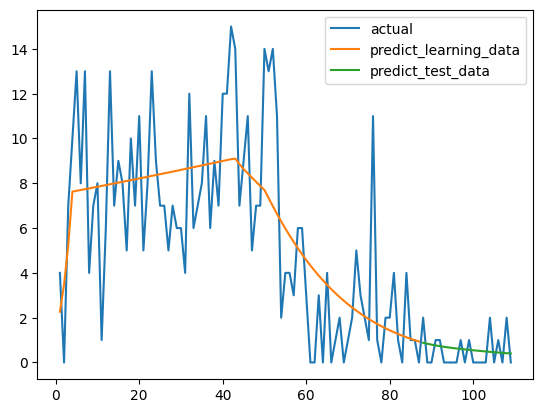

In [73]:
model.eval()

with torch.no_grad():
    y_pred_learning_tensor = model(X_train_tensor)
    y_pred_tensor = model(X_test_tensor)

plt.figure()
plt.plot(df['testing_date'], df['number_of_fault'], label='actual')
plt.plot(scaler_X.inverse_transform(X_train_tensor.numpy()), scaler_y.inverse_transform(y_pred_learning_tensor.numpy()), label='predict_learning_data')
plt.plot(scaler_X.inverse_transform(X_test_tensor.numpy()), scaler_y.inverse_transform(y_pred_tensor.numpy()), label='predict_test_data')
plt.legend()
plt.show()

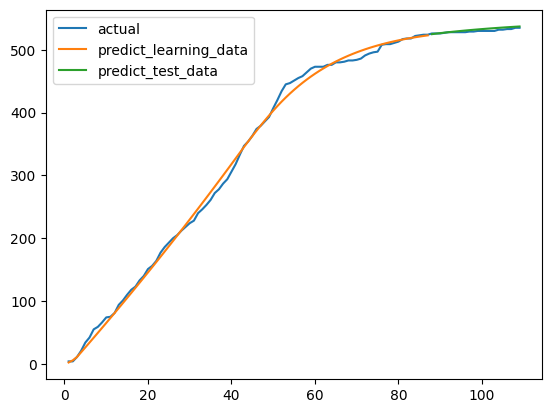

In [74]:
plt.figure()
plt.plot(df['testing_date'], df['cum_number_of_fault'], label='actual')
plt.plot(scaler_X.inverse_transform(X_train_tensor.numpy()), scaler_y.inverse_transform(y_pred_learning_tensor.numpy()).cumsum(), label='predict_learning_data')
plt.plot(scaler_X.inverse_transform(X_test_tensor.numpy()), scaler_y.inverse_transform(y_pred_tensor.numpy()).cumsum() + scaler_y.inverse_transform(y_train).cumsum()[-1], label='predict_test_data')
plt.legend()
plt.show()

In [75]:
for name, param in model.named_parameters():
    print(f"Parameter name: {name}, Parameter value: {param.data}")

Parameter name: input_layer.weight, Parameter value: tensor([[-0.8036],
        [-1.0005],
        [-1.5800],
        [-1.4089],
        [-1.9182],
        [-2.4101],
        [-1.4824],
        [-1.9655],
        [ 3.6454],
        [ 0.7115],
        [-0.6068],
        [-9.7983],
        [-0.9353],
        [ 2.9479],
        [ 0.5659],
        [ 1.5038],
        [-0.2568],
        [ 0.7261],
        [-0.7632],
        [ 1.3744],
        [-0.7067],
        [-0.5842],
        [ 1.3359],
        [-0.4912],
        [-1.1006],
        [ 0.5774],
        [-0.8966],
        [-0.5898],
        [ 0.4920],
        [-0.1224],
        [ 0.2080],
        [ 0.9939]])
Parameter name: input_layer.bias, Parameter value: tensor([-0.7125, -0.0719,  0.9019,  0.6846,  0.9388, -0.3934,  1.5037,  0.9898,
         0.0330,  0.7542,  0.6262,  0.3398, -0.1542, -0.1010, -0.6969,  0.3737,
         0.4240,  0.3719, -0.2736,  0.3422,  0.7209, -0.6311,  0.7773,  0.5227,
         1.1151, -0.2952,  0.9816,  0.6320, -0.